In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("titles.csv")

df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [3]:
df.shape

(5850, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

<AxesSubplot:>

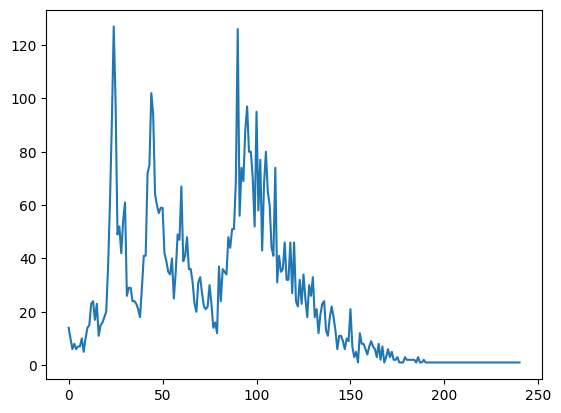

In [5]:
df['runtime'].value_counts().sort_index().plot.line()

<AxesSubplot:>

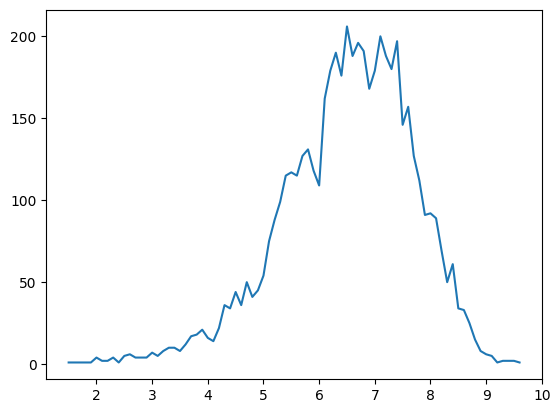

In [6]:
df['imdb_score'].value_counts().sort_index().plot.line()

C:\Users\ezesp\AppData\Local\Temp\ipykernel_6056\2521461170.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  generos = generos.str.replace("[","")
C:\Users\ezesp\AppData\Local\Temp\ipykernel_6056\2521461170.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  generos = generos.str.replace("]","")


<AxesSubplot:>

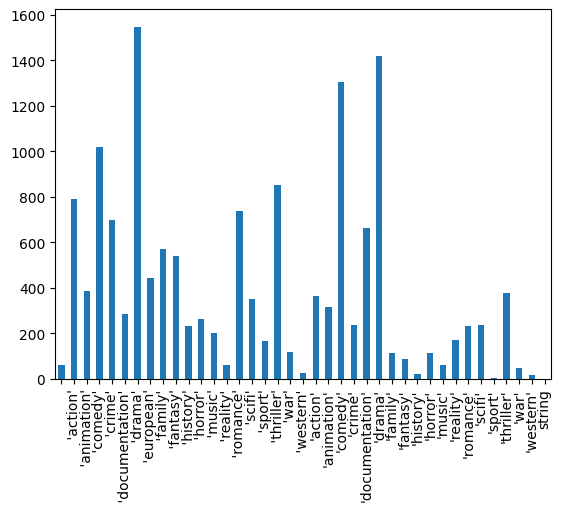

In [17]:
#Limpieza de columna generos
generos = df['genres']
generos = generos.astype("string")
generos = generos.str.replace("[","")
generos = generos.str.replace("]","")
generos = generos.str.split(",",expand=True)
#Agrego todos los generos en una sola columna, en el df original, peliculas con mas de un genero en esta columna
generos_sumados = pd.Series("string")
for col in generos:
    generos_sumados = pd.concat([generos_sumados,generos[col]], ignore_index=True)
#Quito los varoles nulos
generos_sumados = generos_sumados.astype("string")
generos_sumados.sort_values()
generos_sumados = generos_sumados[generos_sumados != "<NA>"]

#Grafico los generos
generos_sumados.value_counts().sort_index().plot.bar()
